In [19]:
print("Hello World")

Hello World


In [20]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)
U_true, _ = np.linalg.qr(rng.standard_normal((60,10)))
V_true, _ = np.linalg.qr(rng.standard_normal((40,10)))
sig_true = np.linspace(5.0 , 0.5 , 10)
S_true = np.diag(sig_true)
A = U_true @ S_true @ V_true.T + 0.2 * rng.standard_normal((60, 40))

In [21]:
A

array([[ 0.05168398, -0.46939809, -0.12725721, ..., -0.28619638,
         0.42631205,  0.17953963],
       [-0.22176905,  0.17457783, -0.06967424, ...,  0.59822428,
        -0.21269521,  0.62208618],
       [ 0.19953064, -0.23301694,  0.15215507, ..., -0.10939462,
         0.16591085, -0.13138784],
       ...,
       [ 0.41493737,  0.23432802, -0.03674857, ..., -0.12896919,
         0.112862  ,  0.05244257],
       [-0.45143448,  0.19669274,  0.20846015, ..., -0.00586914,
        -0.15533679, -0.57606364],
       [ 0.0500254 , -0.706866  ,  0.36762643, ..., -0.29273433,
        -0.55365251, -0.04118834]])

In [ ]:
import numpy as np

import numpy as np

def svd_implementation(A, tol=1e-10):
    m, n = A.shape
    ATA = np.dot(A.T, A)
    eigvals, V = np.linalg.eigh(ATA)
    idx = np.argsort(eigvals)[::-1] # descending order
    eigvals = eigvals[idx]
    V = V[:, idx]
    
    # Only keep nonzero singular values (numerical threshold)
    singular_vals = np.sqrt(np.maximum(eigvals, 0))
    nonzero_idxs = np.where(singular_vals > tol)[0]
    r = len(nonzero_idxs) # rank under tolerance

    # Construct U, Sigma
    U = np.zeros((m, r))
    Sigma = np.zeros((r, r))
    for i, j in enumerate(nonzero_idxs):
        # Calculate left singular vectors
        U[:, i] = np.dot(A, V[:, j]) / singular_vals[j]
        Sigma[i, i] = singular_vals[j]

    # V^T for standard SVD output
    Vt = V[:, nonzero_idxs].T

    return U, Sigma, Vt


In [23]:
#to find svd for these matrices
left, sig, right = svd_implementation(A)
#using rank 1,2,5,10
left1 = left[:,:1]
sig1 = np.diag(sig[:1])
right1 = right[:1,:]
A1 = left1 @ (sig1[:,None] * right1)

print(left1.shape)
print(sig1.shape)
print(right1.shape)
print(A1.shape)

(60, 1)
(1,)
(1, 40)
(60, 40)


In [24]:
#using rank 2
left2 = left[:,:2]
sig2 = sig[:2]
sig2 = np.diag(sig[:2])
right2 = right[:2,:]
A2 = left2 @ (sig2[:,None] * right2)

print(left2.shape)
print(sig2.shape)
print(right2.shape)
print(A2.shape)

(60, 2)
(2,)
(2, 40)
(60, 40)


In [25]:
#using rank 5
left5 = left[:,:5]
sig5 = np.diag(sig[:5])
right5 = right[:5,:]
A5 = left5 @ (sig5[:,None] * right5)

print(left5.shape)
print(sig5.shape)
print(right5.shape)
print(A5.shape)

(60, 5)
(5,)
(5, 40)
(60, 40)


In [26]:
#using rank 10
left10 = left[:,:10]
sig10 = np.diag(sig[:10])
right10 = right[:10,:]
A10 = left10 @ (sig10[:,None] * right10)

print(left10.shape)
print(sig10.shape)
print(right10.shape)
print(A10.shape)

(60, 10)
(10,)
(10, 40)
(60, 40)


In [27]:
#for k = 1
E1 = (A-A1)
E1 = np.square(E1)
E1_sum = np.sum(E1)
error1 = np.sqrt(E1_sum)
error1

np.float64(12.566518263851489)

In [28]:
#for k = 2
E2 = (A-A2)
E2 = np.square(E2)
E2_sum = np.sum(E2)
error2 = np.sqrt(E2_sum)
error2

np.float64(11.732831398708422)

In [29]:
#for k = 5
E5 = (A-A5)
E5 = np.square(E5)
E5_sum = np.sum(E5)
error5 = np.sqrt(E5_sum)
error5

np.float64(9.526732183619313)

In [30]:
#for k = 10
E10 = (A-A10)
E10 = np.square(E10)
E10_sum = np.sum(E10)
error10 = np.sqrt(E10_sum)
error10

np.float64(7.353057322635178)

[[ 1.         12.56651826]
 [ 2.         11.7328314 ]
 [ 5.          9.52673218]
 [10.          7.35305732]]


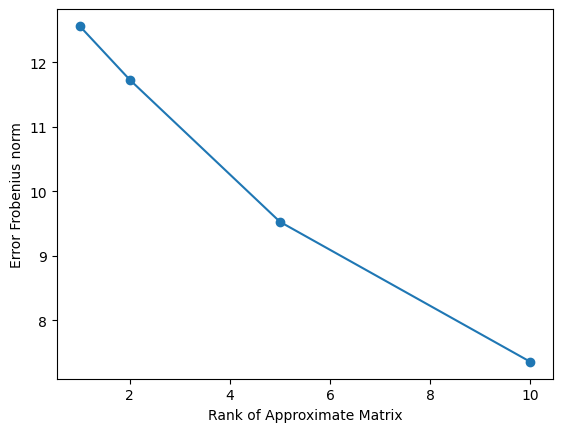

In [31]:
error_table = np.array([[1,error1],[2,error2],[5,error5],[10,error10]])
print(error_table)

x = error_table[:, 0]
y = error_table[:, 1]

plt.plot(x,y, marker='o')
plt.xlabel('Rank of Approximate Matrix')
plt.ylabel('Error Frobenius norm')
plt.show()

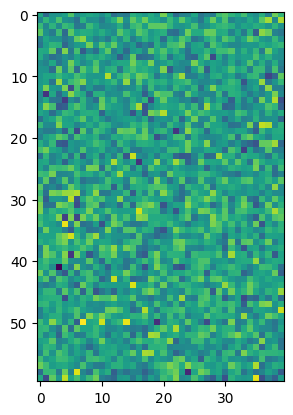

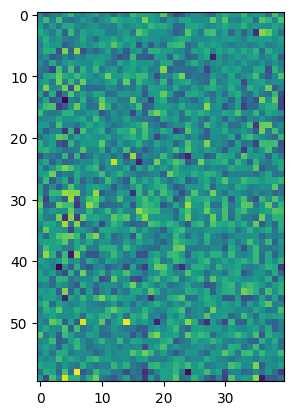

In [32]:
#1.3
fig_original = plt.imshow(A)
plt.show()
fig_A10 = plt.imshow(A10)

In [33]:
#question2
import numpy as np
rng = np.random.default_rng(7)
W_true = np.abs(rng.normal(0.0, 1.0, (50, 4)))
H_true = np.abs(rng.normal(0.0, 1.0, (4, 40)))
A = W_true @ H_true + 0.05 * np.abs(rng.normal(0.0, 1.0, (50, 40)))
A

array([[0.87329231, 1.12575601, 1.48633605, ..., 0.93129501, 0.57969081,
        0.37659731],
       [2.06967888, 1.98652804, 2.38449342, ..., 2.74455795, 0.6594185 ,
        0.88595738],
       [1.24739776, 1.66757734, 1.01295366, ..., 1.88711264, 0.74758034,
        1.23098248],
       ...,
       [1.63554005, 2.82512133, 2.11513013, ..., 1.88378895, 1.57446616,
        1.8917497 ],
       [1.93180787, 1.97823785, 1.83477969, ..., 0.63265919, 0.68220928,
        1.96146137],
       [2.69297729, 2.79506343, 2.96493849, ..., 2.69450145, 0.97427592,
        1.83545332]])

In [34]:
r = 4
W = rng.uniform(0.0, 1.0, (A.shape[0],r))
H = rng.uniform(0.0, 1.0, (r, A.shape[1]))

eps = 1e-9
T = 500
error_array = np.empty(T+1)

error_array[0] = np.linalg.norm(A-(W@H), ord='fro')

<function matplotlib.pyplot.show(close=None, block=None)>

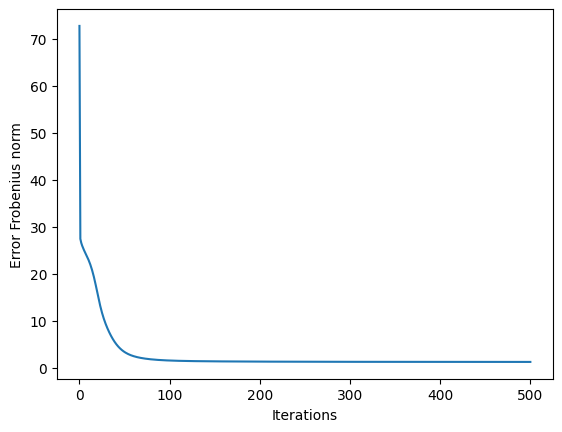

In [35]:
for t in range(1,T+1):
    WH = W@H
    numerator = A @ H.T
    denomenator = (WH @ H.T) + eps
    W *= numerator/denomenator
    np.clip(W, 0, None, W)

    WH = W@H
    numerator = W.T @ A
    denomenator = (W.T @ W @ H) + eps
    H *= numerator/denomenator
    np.clip(H, 0, None, H)

    error_array[t] = np.linalg.norm(A-(W@H), ord='fro')

plt.xlabel("Iterations")
plt.ylabel("Error Frobenius norm")
plt.plot(np.arange(T+1), error_array)
plt.show

In [36]:
print(f"final error is {error_array[-1]}")
print(f"minimum from W array is {W.min()}")
print(f"minimum from H array is {H.min()}")

final error is 1.2467983399655116
minimum from W array is 1.0654174015341917e-07
minimum from H array is 2.171345696650537e-08
